# Think Bayes

This notebook presents example code and exercise solutions for Think Bayes.

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [3]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import classes from thinkbayes2
from thinkbayes2 import Pmf, Cdf, Suite

import thinkplot

## Dungeons and Dragons

In [4]:
def Min(cdf, k):
    return Cdf(cdf.xs, 1 - (1 - cdf.ps)**k)

def get_prob_of_max_and_min(num_players, extrema):
    """Return the probability of a given maximum and minimum, given a certain number of players"""
    maximum, minimum = extrema
    d6 = Pmf(range(1, 7))
    thrice = sum([d6] * 3)
    cdf = Cdf(thrice)
    best = cdf.Max(6 * num_players)
    worst = Min(cdf, 6 * num_players)
    return best[maximum] * worst[minimum]

class DnDSession(Suite):
    
    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        
        data: the maximum and minimum of the party's character attributes
        hypo: number of players in the group
        """
        return get_prob_of_max_and_min(hypo, data)

No handles with labels found to put in legend.


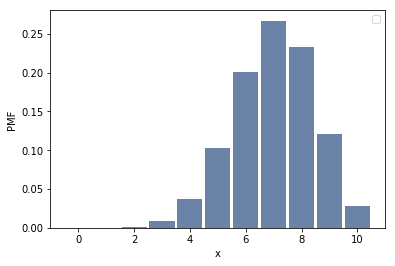

In [5]:
player = Pmf({1: 0.7, 0: 0.3})
prior = DnDSession(sum([player] * 10))
thinkplot.Hist(prior)
thinkplot.Config(xlabel='x', ylabel='PMF')

No handles with labels found to put in legend.


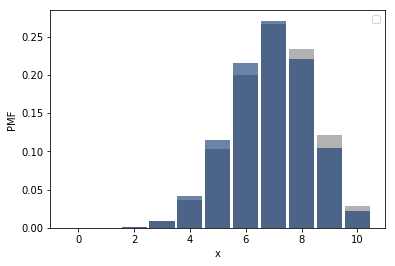

In [6]:
posterior = prior.Copy()
posterior[0] = 0
posterior[1] = 0
posterior.Update((16, 5))
thinkplot.Hist(prior, color='gray')
thinkplot.Hist(posterior)
thinkplot.Config(xlabel='x', ylabel='PMF')

## Cat Allergies

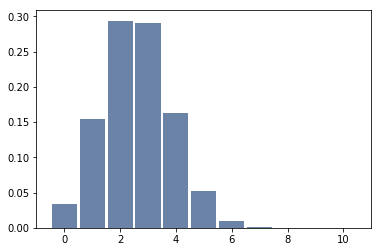

In [7]:
allergic = Pmf({1: 0.5, 0: 0.5})
non_allergic = Pmf({1: 0.1, 0: 0.9})

sneezes = sum([allergic] * 4) + sum([non_allergic] * 6)

thinkplot.Hist(sneezes)

## Gluten

In [19]:
ALLERGIC_LIKELIHOOD = 0.95
NON_ALLERGIC_LIKELIHOOD = 0.4

class GlutenStudy(Suite):
    
    def Likelihood(self, data, hypo):
        """Computes the likelihood of the data under the hypothesis.
        
        data: the number of people who correctly identified the gluten flour
        hypo: the number of gluten-sensitive people
        """
        allergic = Pmf({1: ALLERGIC_LIKELIHOOD, 0: 1-ALLERGIC_LIKELIHOOD})
        non_allergic = Pmf({1: NON_ALLERGIC_LIKELIHOOD, 0: 1-NON_ALLERGIC_LIKELIHOOD})
        dist = sum([allergic] * hypo + [non_allergic] * (34 - hypo))
        return dist[data]

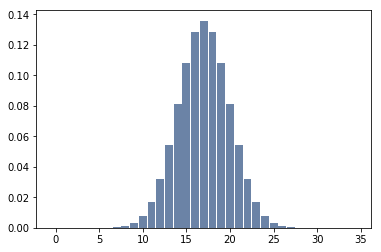

In [20]:
subject = Pmf({1: 0.5, 0: 0.5}) # Assuming 50% likely to be gluten-sensitive as a prior, probably not really true
prior = GlutenStudy(sum([subject] * 34))
thinkplot.Hist(prior)

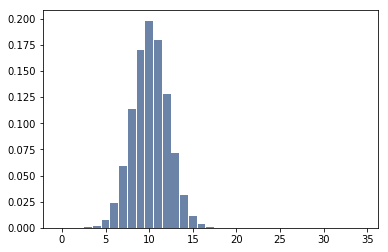

In [21]:
posterior = prior.Copy()
posterior.Update(12)
posterior.Normalize()
thinkplot.Hist(posterior)

## Height